<a href="https://colab.research.google.com/github/kerycheng/Python_machine_learning/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import files #匯入套件

upload = files.upload() #開啟上傳介面並載入

Saving Iris.csv to Iris (3).csv


In [9]:
import numpy as np
import pandas as pd

# 讀取鳶尾花數據集
data = pd.read_csv(r'Iris.csv')

# 隨機抽選10個樣本
# print(data.sample(10))

# 對Species重新賦值
data['Species'] = data['Species'].map({'Iris-versicolor': 0,
                    'Iris-setosa': 1,
                    'Iris-virginica': 2})

# 刪除不需要的Id列
data.drop('Id', axis=1, inplace=True)

# 檢查數據集是否有重複
# print(data.duplicated().any())

# 原先數據集數量
# print(len(data))

# 刪除重複的紀錄
data.drop_duplicates(inplace=True)

# 刪除後的數據集數量
# print(len(data))

# 各個鳶尾花類別共有多少個
print(data['Species'].value_counts())

0    50
2    49
1    48
Name: Species, dtype: int64


In [43]:
class KNN:
  def __init__(self, k):
    '''
    k -> int 鄰居的個數
    '''

    self.k = k

  def fit(self, X, y): # 訓練方法
    '''
    X -> array-like type, [樣本數量, 特徵數量] 待訓練的樣本特徵(屬性)
    y -> array-like type, [樣本數量] 每個樣本的目標值(標籤)
    '''

    # 將X, y轉換成ndarray數組類型
    self.X = np.asarray(X)
    self.y = np.asarray(y)

  def predict(self, X):
    '''
    根據參數傳遞的樣本, 對樣本數據進行預測
    X -> array-like type, [樣本數量, 特徵數量] 待訓練的樣本特徵(屬性)
    result -> array type 預測結果
    '''

    X = np.asarray(X)
    result = []

    # 遍歷ndarray, 每次取數組中的一行
    for x in X:
      # 對測試集中的每一個樣本，一次與訓練及中的所有樣本求距離
      distance = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
      # 排序distance並返回排序前的索引值
      index = distance.argsort()
      # 進行截斷, 只取前k個元素
      index = index[:self.k]
      # 返回數組中每個元素出現的次數
      count = np.bincount(self.y[index])
      # 返回最大的元素對應的索引, 該索引就是我們判定的類別
      # 最大的元素索引就是出現次數最多的元素
      result.append(count.argmax())

    return np.asarray(result)

  def predict2(self, X):
    '''
    根據參數傳遞的樣本, 對樣本數據進行預測(考慮權重)
    X -> array-like type, [樣本數量, 特徵數量] 待訓練的樣本特徵(屬性)
    result -> array type 預測結果
    '''

    X = np.asarray(X)
    result = []

    # 遍歷ndarray, 每次取數組中的一行
    for x in X:
      # 對測試集中的每一個樣本，一次與訓練及中的所有樣本求距離
      distance = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
      # 排序distance並返回排序前的索引值
      index = distance.argsort()
      # 進行截斷, 只取前k個元素
      index = index[:self.k]
      # 返回數組中每個元素出現的次數(使用weights考慮權重, 權重為距離的倒數)
      count = np.bincount(self.y[index], weights=1/distance[index])
      # 返回最大的元素對應的索引, 該索引就是我們判定的類別
      # 最大的元素索引就是出現次數最多的元素
      result.append(count.argmax())

    return np.asarray(result)

In [44]:
from pandas.core.common import random_state

# 提取出每個類別的鳶尾花數據
t0 = data[data['Species'] == 0]
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == 2]

# 對每個類別數據進行洗牌
np.random.seed(0)
t0 = t0.sample(len(t0))
t1 = t1.sample(len(t1))
t2 = t2.sample(len(t2))

# 構建訓練集與測試集
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# 創建KNN對象, 進行訓練與測試
knn = KNN(k = 3)

# 進行訓練
knn.fit(train_X, train_y)

# 進行測試, 獲得測試的結果
result = knn.predict(test_X)

display(np.sum(result == test_y) / len(result))

1.0

In [45]:
# 考慮權重
result2 = knn.predict2(test_X)

display(np.sum(result2 == test_y) / len(result2))

1.0

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 設置在中文字體時能正常顯示負號(-)
plt.rcParams['axes.unicode_minus'] = False

--2023-01-08 16:54:05--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.204.100, 74.125.204.138, 74.125.204.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6d1omiilsutmjciecactdtbloldppiun/1673196825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f005b1f9-554a-435e-a10c-ebf9a77306cd [following]
--2023-01-08 16:54:06--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6d1omiilsutmjciecactdtbloldppiun/1673196825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f005b1f9-554a-435e-a10c-ebf9a77306cd
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0k

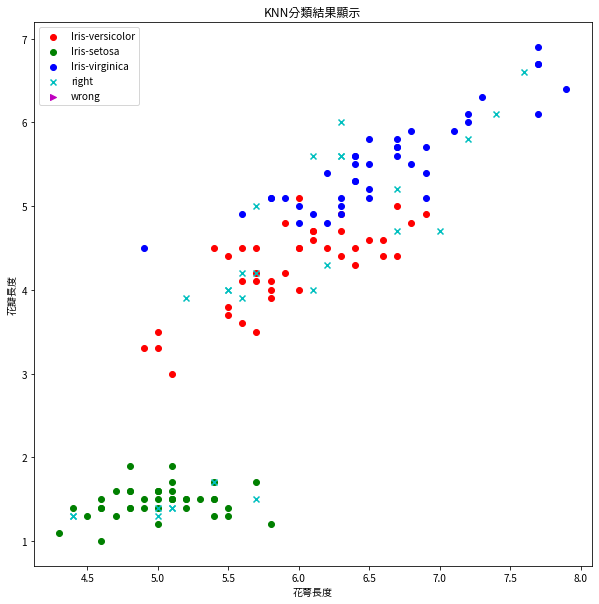

In [42]:
# {'Iris-versicolor': 0, 'Iris-setosa': 1, 'Iris-virginica': 2}
# 設置畫布大小
plt.figure(figsize=(10, 10))
# 繪製訓練集的數據
plt.scatter(x=t0['SepalLengthCm'][:40], y=t0['PetalLengthCm'][:40], color='r', label='Iris-versicolor')
plt.scatter(x=t1['SepalLengthCm'][:40], y=t1['PetalLengthCm'][:40], color='g', label='Iris-setosa')
plt.scatter(x=t2['SepalLengthCm'][:40], y=t2['PetalLengthCm'][:40], color='b', label='Iris-virginica')

# 繪製測試集的數據
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right['SepalLengthCm'], y=right['PetalLengthCm'], color='c', marker='x', label='right')
plt.scatter(x=wrong['SepalLengthCm'], y=wrong['PetalLengthCm'], color='m', marker='>', label='wrong')
plt.xlabel('花萼長度')
plt.ylabel('花瓣長度')
plt.title('KNN分類結果顯示')
plt.legend(loc='best')
plt.show()